In [159]:
import pandas as pd

from matplotlib import pyplot as plt

df= pd.read_csv('weather_data.csv')

col_max= df.max(axis=0)
print(col_max)


Year                2018.0
Month                 12.0
Day                   31.0
Hour                  23.0
Temperature [C]       39.0
Rain [mm]             35.2
Humidity [rel%]      100.0
Pressure [mbar]     1038.0
Cloud Cover [%]      100.0
Wind Speed [kph]      69.0
dtype: float64


In [160]:
#one wind turbine

df.describe()

,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph]
count,90576.000000,90576.00000,90576.000000,90576.000000,90576.000000,90576.000000,90576.000000,90576.000000,90576.000000,90576.000000
mean,2013.158188,6.58691,15.728670,11.500000,18.396154,0.282598,71.263955,1017.349938,22.787118,16.024720
std,3.001101,3.41594,8.799621,6.922225,5.277322,1.178795,14.821302,5.336606,28.301226,7.936121
min,2008.000000,1.00000,1.000000,0.000000,0.000000,0.000000,12.000000,999.000000,0.000000,0.000000
25%,2011.000000,4.00000,8.000000,5.750000,14.000000,0.000000,61.000000,1014.000000,0.000000,10.000000
50%,2013.000000,7.00000,16.000000,11.500000,18.000000,0.000000,74.000000,1017.000000,9.000000,15.000000
75%,2016.000000,10.00000,23.000000,17.250000,22.000000,0.000000,83.000000,1021.000000,37.000000,21.000000
max,2018.000000,12.00000,31.000000,23.000000,39.000000,35.200000,100.000000,1038.000000,100.000000,69.000000


In [161]:
df.loc[df["Wind Speed [kph]"] >= 10 ] 


,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph]
0,2008,7,1,0,16,0.1,82,1011,18,28
1,2008,7,1,1,15,0.0,80,1013,24,26
2,2008,7,1,2,13,0.0,78,1015,30,23
3,2008,7,1,3,11,0.0,76,1017,36,20
4,2008,7,1,4,11,0.0,72,1016,34,19
...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16
90572,2018,10,30,20,15,0.0,56,1021,7,15
90573,2018,10,30,21,14,0.0,59,1021,7,13
90574,2018,10,30,22,14,0.0,60,1021,8,12


In [162]:
col_min= df.min(axis=0)
print(col_min)

Year                2008.0
Month                  1.0
Day                    1.0
Hour                   0.0
Temperature [C]        0.0
Rain [mm]              0.0
Humidity [rel%]       12.0
Pressure [mbar]      999.0
Cloud Cover [%]        0.0
Wind Speed [kph]       0.0
dtype: float64


In [163]:
df_2 = pd.read_csv('wind_power_by_kph.csv')

df_2.describe()


,Wind Speed [kph],power_output
count,103.000000,103.000000
mean,51.000000,681.650485
std,29.877528,391.390976
min,0.000000,0.000000
25%,25.500000,283.500000
50%,51.000000,965.000000
75%,76.500000,982.500000
max,102.000000,1000.000000


In [164]:
wind_Power = df.merge(df_2, on='Wind Speed [kph]', how='left')

wind_Power 

,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],power_output
0,2008,7,1,0,16,0.1,82,1011,18,28,350
1,2008,7,1,1,15,0.0,80,1013,24,26,296
2,2008,7,1,2,13,0.0,78,1015,30,23,224
3,2008,7,1,3,11,0.0,76,1017,36,20,162
4,2008,7,1,4,11,0.0,72,1016,34,19,143
...,...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16,95
90572,2018,10,30,20,15,0.0,56,1021,7,15,81
90573,2018,10,30,21,14,0.0,59,1021,7,13,56
90574,2018,10,30,22,14,0.0,60,1021,8,12,45


In [165]:
wind_Power["Electrical_energy [Wh]"] = wind_Power["power_output"]*wind_Power["Hour"]

wind_Power 



,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],power_output,Electrical_energy [Wh]
0,2008,7,1,0,16,0.1,82,1011,18,28,350,0
1,2008,7,1,1,15,0.0,80,1013,24,26,296,296
2,2008,7,1,2,13,0.0,78,1015,30,23,224,448
3,2008,7,1,3,11,0.0,76,1017,36,20,162,486
4,2008,7,1,4,11,0.0,72,1016,34,19,143,572
...,...,...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16,95,1805
90572,2018,10,30,20,15,0.0,56,1021,7,15,81,1620
90573,2018,10,30,21,14,0.0,59,1021,7,13,56,1176
90574,2018,10,30,22,14,0.0,60,1021,8,12,45,990


In [166]:
wind_Power["Electricity [KWh]"] = wind_Power["Electrical_energy [Wh]"]/100

wind_Power 

,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],power_output,Electrical_energy [Wh],Electricity [KWh]
0,2008,7,1,0,16,0.1,82,1011,18,28,350,0,0.00
1,2008,7,1,1,15,0.0,80,1013,24,26,296,296,2.96
2,2008,7,1,2,13,0.0,78,1015,30,23,224,448,4.48
3,2008,7,1,3,11,0.0,76,1017,36,20,162,486,4.86
4,2008,7,1,4,11,0.0,72,1016,34,19,143,572,5.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16,95,1805,18.05
90572,2018,10,30,20,15,0.0,56,1021,7,15,81,1620,16.20
90573,2018,10,30,21,14,0.0,59,1021,7,13,56,1176,11.76
90574,2018,10,30,22,14,0.0,60,1021,8,12,45,990,9.90


<AxesSubplot:xlabel='Year'>

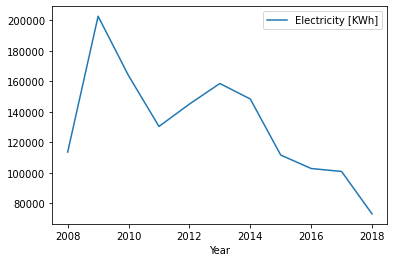

In [167]:
# Sum of electrical power produce by one wind turbine

Capacity = wind_Power.groupby('Year', as_index=False)['Electricity [KWh]'].sum()

Capacity.plot(x="Year", y = "Electricity [KWh]")

<AxesSubplot:xlabel='Year', ylabel='Electricity [KWh]'>

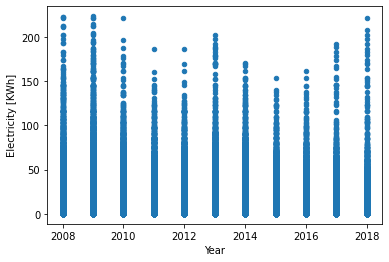

In [168]:
wind_Power.plot(x ='Year', y='Electricity [KWh]', kind ="scatter")


<AxesSubplot:xlabel='Wind Speed [kph]'>

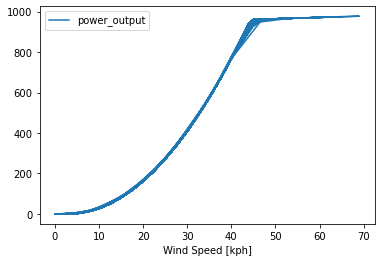

In [169]:
wind_Power.plot(x ='Wind Speed [kph]', y='power_output', kind ="line")

<AxesSubplot:xlabel='Year', ylabel='Wind Speed [kph]'>

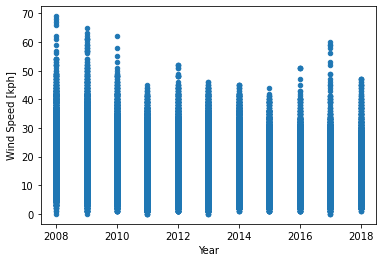

In [170]:
wind_Power.plot(x ='Year', y='Wind Speed [kph]', kind ="scatter")

In [171]:
lower_state = wind_Power.loc[wind_Power['power_output']< 100].reset_index()

lower_state


,index,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],power_output,Electrical_energy [Wh],Electricity [KWh]
0,10,2008,7,1,10,17,0.0,53,1015,0,14,68,680,6.80
1,11,2008,7,1,11,19,0.0,52,1014,0,11,36,396,3.96
2,12,2008,7,1,12,21,0.0,51,1013,0,8,14,168,1.68
3,13,2008,7,1,13,21,0.0,54,1013,0,7,9,117,1.17
4,14,2008,7,1,14,21,0.0,58,1012,0,6,5,70,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51144,90571,2018,10,30,19,15,0.0,54,1020,7,16,95,1805,18.05
51145,90572,2018,10,30,20,15,0.0,56,1021,7,15,81,1620,16.20
51146,90573,2018,10,30,21,14,0.0,59,1021,7,13,56,1176,11.76
51147,90574,2018,10,30,22,14,0.0,60,1021,8,12,45,990,9.90


In [172]:
 cond_state = lower_state.groupby('power_output', as_index=False)['Hour'].count()
    
cond_state

,power_output,Hour
0,0,1744
1,1,1755
2,2,2477
3,5,3316
4,9,3191
5,14,3839
6,20,4437
7,27,4255
8,36,3838
9,45,4916


<AxesSubplot:xlabel='power_output'>

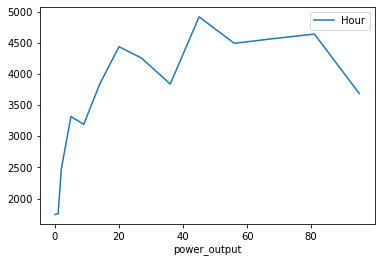

In [173]:
#Lower state condition

cond_state.plot(x='power_output',y='Hour')

In [174]:
df_3 = df.merge(df_2, on='Wind Speed [kph]', how='left')

df_3.to_csv('Wind_Power_output.csv', index=False)

In [175]:
df_3.describe()

,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],power_output
count,90576.000000,90576.00000,90576.000000,90576.000000,90576.000000,90576.000000,90576.000000,90576.000000,90576.000000,90576.000000,90576.00000
mean,2013.158188,6.58691,15.728670,11.500000,18.396154,0.282598,71.263955,1017.349938,22.787118,16.024720,129.61492
std,3.001101,3.41594,8.799621,6.922225,5.277322,1.178795,14.821302,5.336606,28.301226,7.936121,144.86480
min,2008.000000,1.00000,1.000000,0.000000,0.000000,0.000000,12.000000,999.000000,0.000000,0.000000,0.00000
25%,2011.000000,4.00000,8.000000,5.750000,14.000000,0.000000,61.000000,1014.000000,0.000000,10.000000,27.00000
50%,2013.000000,7.00000,16.000000,11.500000,18.000000,0.000000,74.000000,1017.000000,9.000000,15.000000,81.00000
75%,2016.000000,10.00000,23.000000,17.250000,22.000000,0.000000,83.000000,1021.000000,37.000000,21.000000,182.00000
max,2018.000000,12.00000,31.000000,23.000000,39.000000,35.200000,100.000000,1038.000000,100.000000,69.000000,977.00000


In [176]:
df_5 = pd.read_csv('solar_potential_by_hour.csv')

In [177]:
df_5.describe()

,Hour,potential
count,24.000000,24.000000
mean,11.500000,0.229083
std,7.071068,0.352892
min,0.000000,0.000000
25%,5.750000,0.000000
50%,11.500000,0.000000
75%,17.250000,0.361750
max,23.000000,0.980000


In [178]:
#one solar panel 200W

df_8 = df.merge(df_5, on='Hour', how='left')

df_8

,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],potential
0,2008,7,1,0,16,0.1,82,1011,18,28,0.0
1,2008,7,1,1,15,0.0,80,1013,24,26,0.0
2,2008,7,1,2,13,0.0,78,1015,30,23,0.0
3,2008,7,1,3,11,0.0,76,1017,36,20,0.0
4,2008,7,1,4,11,0.0,72,1016,34,19,0.0
...,...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16,0.0
90572,2018,10,30,20,15,0.0,56,1021,7,15,0.0
90573,2018,10,30,21,14,0.0,59,1021,7,13,0.0
90574,2018,10,30,22,14,0.0,60,1021,8,12,0.0


In [179]:
df_6 = pd.read_csv('solar_potential_by_month.csv')

In [180]:
df_7 = df.merge(df_6, on='Month', how='left')

df_7

,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],potential
0,2008,7,1,0,16,0.1,82,1011,18,28,0.853
1,2008,7,1,1,15,0.0,80,1013,24,26,0.853
2,2008,7,1,2,13,0.0,78,1015,30,23,0.853
3,2008,7,1,3,11,0.0,76,1017,36,20,0.853
4,2008,7,1,4,11,0.0,72,1016,34,19,0.853
...,...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16,0.956
90572,2018,10,30,20,15,0.0,56,1021,7,15,0.956
90573,2018,10,30,21,14,0.0,59,1021,7,13,0.956
90574,2018,10,30,22,14,0.0,60,1021,8,12,0.956


In [181]:
df_9 = df_8.merge(df_6, on='Month', how='left')

df_9


,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],potential_x,potential_y
0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853
1,2008,7,1,1,15,0.0,80,1013,24,26,0.0,0.853
2,2008,7,1,2,13,0.0,78,1015,30,23,0.0,0.853
3,2008,7,1,3,11,0.0,76,1017,36,20,0.0,0.853
4,2008,7,1,4,11,0.0,72,1016,34,19,0.0,0.853
...,...,...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16,0.0,0.956
90572,2018,10,30,20,15,0.0,56,1021,7,15,0.0,0.956
90573,2018,10,30,21,14,0.0,59,1021,7,13,0.0,0.956
90574,2018,10,30,22,14,0.0,60,1021,8,12,0.0,0.956


In [182]:
df_9.to_csv('weather_solar_potential.csv')

In [183]:
df_9["SCLD"] = (1-df_9["Cloud Cover [%]"]/100)**2

df_9

,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],potential_x,potential_y,SCLD
0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724
1,2008,7,1,1,15,0.0,80,1013,24,26,0.0,0.853,0.5776
2,2008,7,1,2,13,0.0,78,1015,30,23,0.0,0.853,0.4900
3,2008,7,1,3,11,0.0,76,1017,36,20,0.0,0.853,0.4096
4,2008,7,1,4,11,0.0,72,1016,34,19,0.0,0.853,0.4356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16,0.0,0.956,0.8649
90572,2018,10,30,20,15,0.0,56,1021,7,15,0.0,0.956,0.8649
90573,2018,10,30,21,14,0.0,59,1021,7,13,0.0,0.956,0.8649
90574,2018,10,30,22,14,0.0,60,1021,8,12,0.0,0.956,0.8464


In [184]:
# Power for 200W

df_9["Power[W]"]=df_9["potential_x"] * df_9 ["potential_y"] * df_9["SCLD"] * 200

df_9

,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],potential_x,potential_y,SCLD,Power[W]
0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
1,2008,7,1,1,15,0.0,80,1013,24,26,0.0,0.853,0.5776,0.0
2,2008,7,1,2,13,0.0,78,1015,30,23,0.0,0.853,0.4900,0.0
3,2008,7,1,3,11,0.0,76,1017,36,20,0.0,0.853,0.4096,0.0
4,2008,7,1,4,11,0.0,72,1016,34,19,0.0,0.853,0.4356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16,0.0,0.956,0.8649,0.0
90572,2018,10,30,20,15,0.0,56,1021,7,15,0.0,0.956,0.8649,0.0
90573,2018,10,30,21,14,0.0,59,1021,7,13,0.0,0.956,0.8649,0.0
90574,2018,10,30,22,14,0.0,60,1021,8,12,0.0,0.956,0.8464,0.0


<AxesSubplot:xlabel='Cloud Cover [%]', ylabel='Power[W]'>

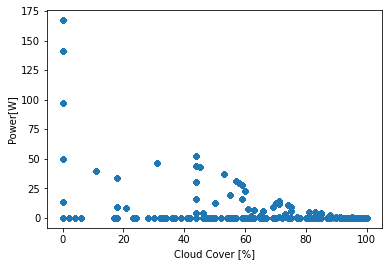

In [185]:
cloud_impact = df_9.loc[df_9["Power[W]"].astype(int)]

cloud_impact.plot(x="Cloud Cover [%]", y="Power[W]", kind="scatter")

<AxesSubplot:xlabel='Humidity [rel%]', ylabel='Cloud Cover [%]'>

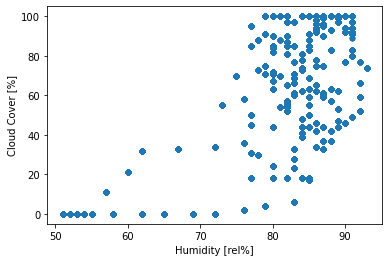

In [186]:
cloud_impact.plot(x="Humidity [rel%]", y="Cloud Cover [%]", kind="scatter")

In [187]:
lower_state = df_9.loc[df_9['Power[W]']< 100].reset_index()

lower_state

,index,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],potential_x,potential_y,SCLD,Power[W]
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
1,1,2008,7,1,1,15,0.0,80,1013,24,26,0.0,0.853,0.5776,0.0
2,2,2008,7,1,2,13,0.0,78,1015,30,23,0.0,0.853,0.4900,0.0
3,3,2008,7,1,3,11,0.0,76,1017,36,20,0.0,0.853,0.4096,0.0
4,4,2008,7,1,4,11,0.0,72,1016,34,19,0.0,0.853,0.4356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77865,90571,2018,10,30,19,15,0.0,54,1020,7,16,0.0,0.956,0.8649,0.0
77866,90572,2018,10,30,20,15,0.0,56,1021,7,15,0.0,0.956,0.8649,0.0
77867,90573,2018,10,30,21,14,0.0,59,1021,7,13,0.0,0.956,0.8649,0.0
77868,90574,2018,10,30,22,14,0.0,60,1021,8,12,0.0,0.956,0.8464,0.0


In [188]:
whole_n = lower_state.loc[lower_state["Power[W]"].astype(int)]

whole_n

,index,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],potential_x,potential_y,SCLD,Power[W]
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0
0,0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0


In [189]:
df_9["ELectricity [KWh]"] = (df_9["Power[W]"]/1000)* df_9["Hour"]

df_9

,Year,Month,Day,Hour,Temperature [C],Rain [mm],Humidity [rel%],Pressure [mbar],Cloud Cover [%],Wind Speed [kph],potential_x,potential_y,SCLD,Power[W],ELectricity [KWh]
0,2008,7,1,0,16,0.1,82,1011,18,28,0.0,0.853,0.6724,0.0,0.0
1,2008,7,1,1,15,0.0,80,1013,24,26,0.0,0.853,0.5776,0.0,0.0
2,2008,7,1,2,13,0.0,78,1015,30,23,0.0,0.853,0.4900,0.0,0.0
3,2008,7,1,3,11,0.0,76,1017,36,20,0.0,0.853,0.4096,0.0,0.0
4,2008,7,1,4,11,0.0,72,1016,34,19,0.0,0.853,0.4356,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90571,2018,10,30,19,15,0.0,54,1020,7,16,0.0,0.956,0.8649,0.0,0.0
90572,2018,10,30,20,15,0.0,56,1021,7,15,0.0,0.956,0.8649,0.0,0.0
90573,2018,10,30,21,14,0.0,59,1021,7,13,0.0,0.956,0.8649,0.0,0.0
90574,2018,10,30,22,14,0.0,60,1021,8,12,0.0,0.956,0.8464,0.0,0.0


<AxesSubplot:xlabel='Year'>

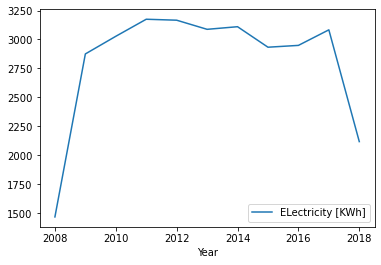

In [190]:
Capacity = df_9.groupby('Year', as_index=False)['ELectricity [KWh]'].sum()

Capacity.plot(x="Year", y="ELectricity [KWh]")